In [34]:
import os

In [35]:
#import kagglehub
#kagglehub.dataset_download('techsash/waste-classification-data')

In [36]:
garbage_type = os.listdir('DATASET/TRAIN')
print(garbage_type)

['O', 'R']


In [37]:
x_train = []
y_train = []

x_test = []
y_test = []

for type in garbage_type:
    folder_path = os.path.join('DATASET/TRAIN',type)
    folder_path2 = os.path.join('DATASET/TEST',type)
    if os.path.isdir(folder_path):
        print(f"{type} type contain {len(os.listdir(folder_path))} images")
        for i in os.listdir(folder_path):
            x_train.append(type + '/' + i)
            y_train.append(type)
        for i in os.listdir(folder_path2):     
            x_test.append(type + '/' + i)
            y_test.append(type)
print('X_train:',x_train[:5])
print(len(x_train))
print('Y_train:',y_train[:5])
print(len(y_train))
print('X_test:',x_test[:5])
print(len(x_test))
print('Y_test:',y_test[:5])
print(len(y_test))
  

O type contain 12565 images
R type contain 9999 images
X_train: ['O/O_1.jpg', 'O/O_10.jpg', 'O/O_100.jpg', 'O/O_1000.jpg', 'O/O_10000.jpg']
22564
Y_train: ['O', 'O', 'O', 'O', 'O']
22564
X_test: ['O/O_12568.jpg', 'O/O_12569.jpg', 'O/O_12570.jpg', 'O/O_12571.jpg', 'O/O_12572.jpg']
2513
Y_test: ['O', 'O', 'O', 'O', 'O']
2513


In [38]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create DataFrame  
data = {
    'filepath': x_train,   # image paths
    'label': y_train  
}
train_df = pd.DataFrame(data)

#train_df = train_df.sample(n=10000, random_state=42)  #choose 10000 random example 
print(len(train_df))


train_data_gen = ImageDataGenerator(rescale=1./255)  # normalize images to range [0, 1] 

# load data from flow_from_dataframe 
train_generator = train_data_gen.flow_from_dataframe(
    dataframe=train_df,         # DataFrame
    x_col='filepath',           
    y_col='label',              
    target_size=(384, 384),     # rescale images to 384x384 
    batch_size=16,              
    class_mode='categorical',   # Label type
    seed=42,                     
    shuffle=True,                # shuffle data
    directory = 'C:/Users/FURKAN/AppData/Roaming/Code/User/Code_of_C/ML/Kurs-2/MyML4/DATASET/TRAIN' # dataset path
)

22564
Found 22564 validated image filenames belonging to 2 classes.


In [39]:
train_data_gen = ImageDataGenerator(  # increase data and variety , avoid overfitting
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
testimages_df = pd.DataFrame({
    'filepath': x_test,  
    'label': y_test         
})

test_data_gen = ImageDataGenerator(rescale=1./255)


test_generator = test_data_gen.flow_from_dataframe(
    dataframe=testimages_df,          
    x_col='filepath',           
    y_col='label',              
    target_size=(384, 384),     
    batch_size=16,             
    class_mode='categorical',   
    shuffle=False,              
    seed=42,                     
    directory = 'C:/Users/FURKAN/AppData/Roaming/Code/User/Code_of_C/ML/Kurs-2/MyML4/DATASET/TEST' # dataset path
)

Found 2513 validated image filenames belonging to 2 classes.


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Basic CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(384, 384, 3)),  # Input layer
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # softmax for categorical labels
])

c:\Users\FURKAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 382, 382, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 191, 191, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 189, 189, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 94, 94, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 565504)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │    36,192,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,211,842 (138.14 MB)

 Trainable params: 36,211,842 (138.14 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(
    train_generator,          
    epochs=5,                
    steps_per_epoch=len(train_generator),  
    validation_data=test_generator,
    validation_steps = len(test_generator)
)

Epoch 1/5
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 595s 422ms/step - accuracy: 0.8641 - loss: 0.3317 - val_accuracy: 0.8727 - val_loss: 0.3353
Epoch 2/5
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 596s 422ms/step - accuracy: 0.9164 - loss: 0.2208 - val_accuracy: 0.8241 - val_loss: 0.4557
Epoch 3/5
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 675s 479ms/step - accuracy: 0.9544 - loss: 0.1292 - val_accuracy: 0.8130 - val_loss: 0.9370
Epoch 4/5
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 689s 488ms/step - accuracy: 0.9758 - loss: 0.0804 - val_accuracy: 0.8388 - val_loss: 0.6552
Epoch 5/5
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 705s 500ms/step - accuracy: 0.9871 - loss: 0.0538 - val_accuracy: 0.8341 - val_loss: 0.8175


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: O


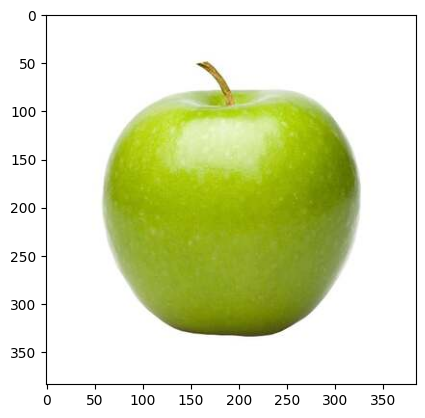

In [78]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image = cv.imread('yesilelma.jpeg')
image = cv.cvtColor(image,cv.COLOR_BGR2RGB) # convert to RGB

plt.imshow(image,cmap=plt.cm.binary)

prediction = model.predict(np.array([image]) / 255) # normalize input and predict
index = np.argmax(prediction) # choose most probability in 10 output
print("Prediction:",garbage_type[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: R


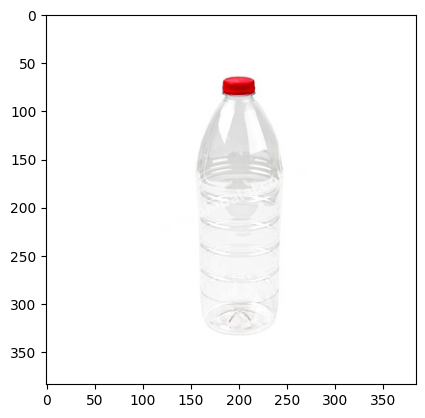

In [79]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image using OpenCV
image = cv.imread('petsise.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert from BGR to RGB

plt.imshow(image,cmap=plt.cm.binary)

prediction = model.predict(np.array([image]) / 255) # normalize input and predict
index = np.argmax(prediction) # choose most probability in 10 output
print("Prediction:",garbage_type[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: O


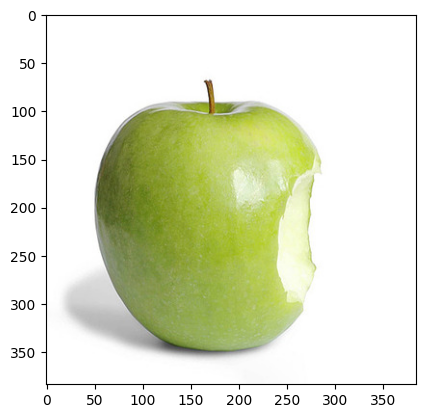

In [80]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image = cv.imread('yesilelma2.jpg')
image = cv.cvtColor(image,cv.COLOR_BGR2RGB) # convert to RGB

plt.imshow(image,cmap=plt.cm.binary)

prediction = model.predict(np.array([image]) / 255) # normalize input and predict
index = np.argmax(prediction) # choose most probability in 10 output
print("Prediction:",garbage_type[index])